## Loading the matrices

In [6]:
import pandas as pd
import numpy as np

# Read the CSV file
df_structural = pd.read_csv('/Users/charlesxu/local/repo/MesoCompPrimitives/data/structural_connectivity_matrix.csv')
df_functional = pd.read_csv('/Users/charlesxu/local/repo/MesoCompPrimitives/data/functional_connectivity_matrix.csv')

# Convert to square matrix (assuming first column might be row labels)
if df_structural.shape[1] == df_structural.shape[0] + 1:
    # If there's an extra column (likely row labels), drop it
    A_structural = df_structural.iloc[:, 1:].values
    A_functional = df_functional.iloc[:, 1:].values
else:
    # Otherwise, use all columns
    A_structural = df_structural.values
    A_functional = df_functional.values

print(f"Structural matrix shape: {A_structural.shape}")
print(f"Functional matrix shape: {A_functional.shape}")

Structural matrix shape: (475, 475)
Functional matrix shape: (475, 475)


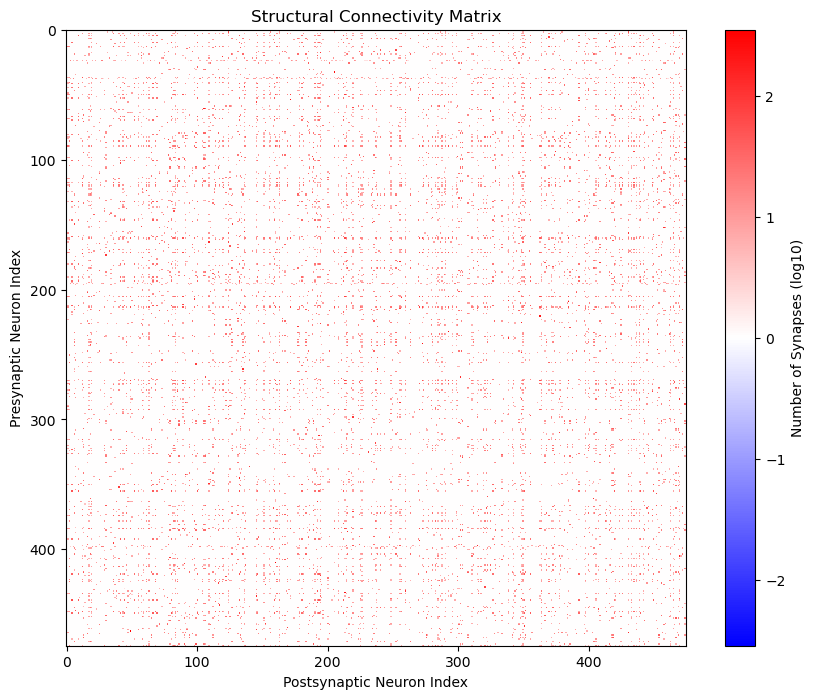

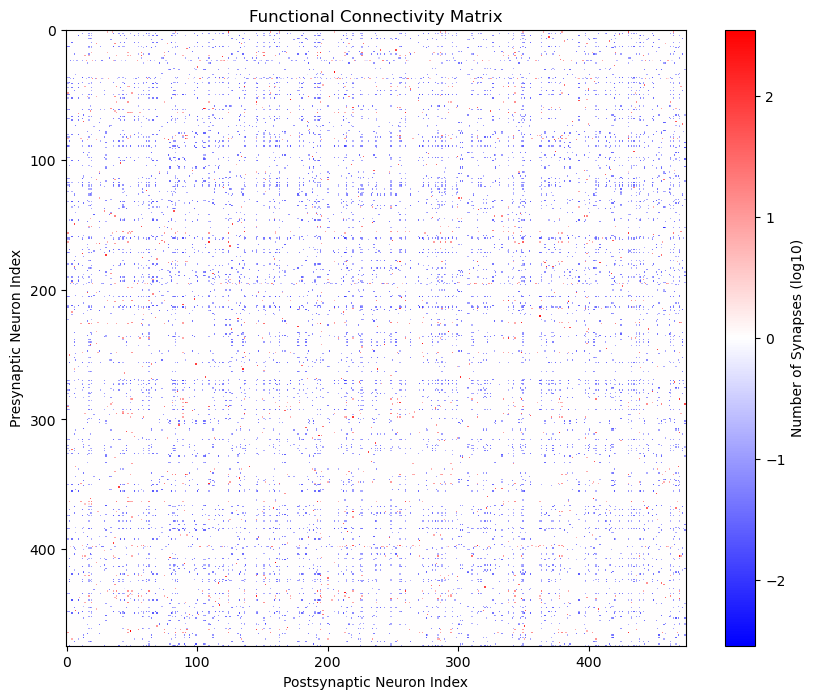

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(np.log10(np.abs(A_structural) + 1) * np.sign(A_structural), 
           cmap='bwr', aspect='auto', 
           vmin=-np.max(np.log10(np.abs(A_structural) + 1)), 
           vmax=np.max(np.log10(np.abs(A_structural) + 1)),
           interpolation='none')
plt.colorbar(label='Number of Synapses (log10)')
plt.title('Structural Connectivity Matrix')
plt.xlabel('Postsynaptic Neuron Index')
plt.ylabel('Presynaptic Neuron Index')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(np.log10(np.abs(A_functional) + 1) * np.sign(A_functional), 
           cmap='bwr', aspect='auto', 
           vmin=-np.max(np.log10(np.abs(A_functional) + 1)), 
           vmax=np.max(np.log10(np.abs(A_functional) + 1)),
           interpolation='none')
plt.colorbar(label='Number of Synapses (log10)')
plt.title('Functional Connectivity Matrix')
plt.xlabel('Postsynaptic Neuron Index')
plt.ylabel('Presynaptic Neuron Index')
plt.show()

## Graph Laplacian